# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
Dataset_Link = "https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv"
dataset = pd.read_csv(Dataset_Link, comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. Se trata de un dataset que describe variables asociadas a la situación crediticia de distintos clientes a los que se les ha otorgado un crédito. Es una base de datos generada con el objetivo de armar un modelo que pueda predecir si un requiriente de un préstamo puede terminar pagándolo o no.  

2. La variable objetivo es TARGET y es binaria, donde 1 indica que el cliente no cumplió con el pago, y 0 indica que pudo pagar el préstamo.  

3. Información (atributos) disponibles:

- TARGET  Variable objetivo (1: No pagó, 0: Sí pagó)
- LOAN    Cantidad de dinero prestado/requerido
- MORTDUE Monto adeudado por hipotecas existentes (entendemos que previas o distintas a este préstamo)
- VALUE   Valor de la propiedad actual
- YOJ     Antigüedad en el puesto de trabajo (años)
- DEROG   Cantidad de informes negativos o desfavorables para un crédito
- DELINQ  Cantidad de cŕeditos donde presenta morosidad
- CLAGE   Cantidad de meses del crédito más antigüo
- NINQ    Cantidad de créditos que se han tomado recientemente
- CLNO    Cantidad de créditos que se han tomado (entendemos que abarca recientes y más a largo plazo)
- DEBTINC Proporción deuda-ingreso

4. Previo a hacer el análisis, intuimos que los atributos más importantes serán: LOAN, DELINQ, DEBTINC, DEROG

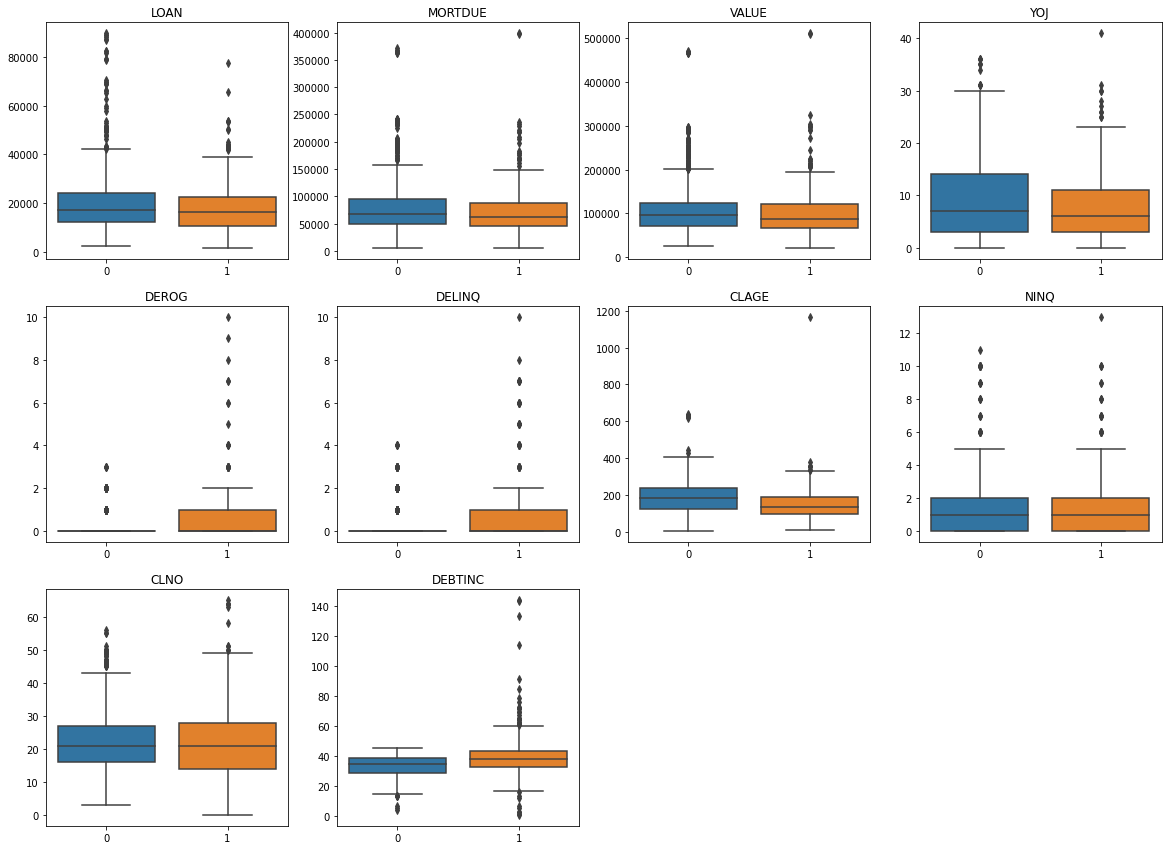

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))

for i,col in enumerate(dataset.columns[1:]):
    plt.subplot(4,4,i+1)
    sns.boxplot(x = 'TARGET', y = col, data = dataset)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(col)
plt.show()

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

clf = make_pipeline(StandardScaler(),
                    SGDClassifier(random_state= 1))

clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=1,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

#### Evaluación del modelo sobre el conjunto de entrenamiento

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1232
           1       0.68      0.40      0.50       251

    accuracy                           0.87      1483
   macro avg       0.78      0.68      0.71      1483
weighted avg       0.85      0.87      0.85      1483



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[1185,   47],
       [ 151,  100]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

print(f' True negative:{tn},False positive:{fp}, False negative: {fn}, True positive: {tp}')

 True negative:1185,False positive:47, False negative: 151, True positive: 100


#### Evaluación del modelo sobre el conjunto de test

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       313
           1       0.63      0.33      0.43        58

    accuracy                           0.87       371
   macro avg       0.76      0.65      0.68       371
weighted avg       0.85      0.87      0.85       371



In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[302,  11],
       [ 39,  19]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print(f' True negative:{tn},False positive:{fp}, False negative: {fn}, True positive: {tp}')

 True negative:302,False positive:11, False negative: 39, True positive: 19


**Al evaluar sobre ambos conjuntos, el clasificador da precisiones globales muy similares, en torno al 87%. Sin embargo, hay bastante confusión respecto a los datos tomados como verdaderos en cada caso. Por ejemplo, el recall para la clase 1 es muy bajo en ambos casos (0.40 y 0.33 respectivamente). Esto indica que el clasificador está encontrando menos de la mitad de los valores verdaderos en el caso de TARGET =1**

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'model__loss':['hinge', 'log','squared_loss'], 'model__learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'], 
              'model__penalty': ['l2', 'l1', 'elasticnet'], 'model__eta0': [ 1e-6,0.001, 0.01, 0.1, 1, 10]}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model',SGDClassifier( random_state= 1))])
clf = GridSearchCV(pipeline, parameters, scoring=('accuracy', 'explained_variance'), cv = 5,return_train_score=True, refit='accuracy')

clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                                      epsilon=0.1, eta0=0.0,
                                                      fit_intercept=True,
                                                      l1_ratio=0.15,
                                                      learning_rate='optimal',
                          

In [ ]:
results = clf.cv_results_
df = pd.DataFrame(results)
df[['param_model__learning_rate', 'param_model__loss','param_model__penalty', 'param_model__eta0', 'mean_train_accuracy', 'mean_train_explained_variance']]

,param_model__learning_rate,param_model__loss,param_model__penalty,param_model__eta0,mean_train_accuracy,mean_train_explained_variance
0,constant,hinge,l2,1e-06,0.862947,0.092655
1,constant,hinge,l1,1e-06,0.862947,0.092655
2,constant,hinge,elasticnet,1e-06,0.862947,0.092655
3,constant,log,l2,1e-06,0.862947,0.092655
4,constant,log,l1,1e-06,0.863284,0.095531
...,...,...,...,...,...,...
211,adaptive,log,l1,10,0.873062,0.165098
212,adaptive,log,elasticnet,10,0.872893,0.164597
213,adaptive,squared_loss,l2,10,0.863790,0.140797
214,adaptive,squared_loss,l1,10,0.863453,0.140759


In [ ]:
display ('Best configuraton:')
display(clf.best_params_)

best_model = clf.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

'Best configuraton:'

{'model__eta0': 1,
 'model__learning_rate': 'invscaling',
 'model__loss': 'hinge',
 'model__penalty': 'l2'}

In [ ]:
#Conjunto de Train
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1232
           1       0.81      0.31      0.45       251

    accuracy                           0.87      1483
   macro avg       0.84      0.65      0.69      1483
weighted avg       0.86      0.87      0.85      1483



In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[1214,   18],
       [ 173,   78]])

In [ ]:
#Conjunto de Test
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       313
           1       0.77      0.29      0.42        58

    accuracy                           0.88       371
   macro avg       0.83      0.64      0.68       371
weighted avg       0.87      0.88      0.85       371



In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[308,   5],
       [ 41,  17]])

De los resultados obtenidos con la lista de parametros pasada al gridsearch podemos concluir que la combinación de parametros que consigue los mejores resultados es **{eta0: 1,
 learning_rate: 'invscaling',
 loss: 'hinge',
 penalty: 'l2'}**.

 Con esta combinación obtenemos un punto más de accuracy en el conjunto de test(88) con respecto al modelo por defecto, aumenta levemente la precision pero baja un punto el recall.

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


#Conjunto de entrenamiento
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



Al comparar los resultados obtenidos entre el conjunto de train y el de test notamos que cuando no se determina la profundidad máxima del árbol  el indicador es muy alto (incluso 1 en primer modelo) lo que indica overfitting

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[1232,    0],
       [   0,  251]])

In [ ]:
#Conjunto de Test
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[290,  23],
       [ 21,  37]])

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Corremos el model con difersos parámetros para analizar su comportamiento.

In [ ]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth':[None, 3, 5, 7, 10, 20, 40], 'min_samples_split': [2,3,4], 'min_samples_leaf':[1,2,3,4]}
tree = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(tree, parameters, scoring=('accuracy', 'explained_variance'), cv = 5,return_train_score=True, refit='accuracy')

clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10, 20, 40],
 

In [ ]:
results = clf.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth','param_min_samples_leaf', 'param_min_samples_split', 'mean_train_accuracy', 'mean_train_explained_variance']]

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_train_accuracy,mean_train_explained_variance
0,gini,None,1,2,1.000000,1.000000
1,gini,None,1,3,0.996628,0.976112
2,gini,None,1,4,0.989716,0.927027
3,gini,None,2,2,0.974376,0.820594
4,gini,None,2,3,0.974376,0.820594
...,...,...,...,...,...,...
163,entropy,40,3,3,0.967803,0.771296
164,entropy,40,3,4,0.967803,0.771296
165,entropy,40,4,2,0.953474,0.671449
166,entropy,40,4,3,0.953474,0.671449


Abajo elegimos el modelo con mejor configuración

In [ ]:
display ('Best configuraton:')
display(clf.best_params_)

best_model = clf.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

'Best configuraton:'

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
#Conjunto de Train
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1232
           1       0.99      0.71      0.83       251

    accuracy                           0.95      1483
   macro avg       0.97      0.86      0.90      1483
weighted avg       0.95      0.95      0.95      1483



In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[1207,   25],
       [ 147,  104]])

In [ ]:
#Conjunto de Test
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       313
           1       0.75      0.52      0.61        58

    accuracy                           0.90       371
   macro avg       0.83      0.74      0.78       371
weighted avg       0.89      0.90      0.89       371



In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[303,  10],
       [ 28,  30]])

Al comparar los resultados de los parámetros "por defecto" con "Best Configuration", nos encontramos con que en train el accuracy obviamente disminuye ya que esta claramente overfiteado pero el Accuracy mejora en test ya que generaliza mejor.

Tambien es probable que el arbol con una profunidad de 10 sea demasiado complejo y no agregue demasiado. En los graficos de abajo podemos ver que partir de una profunidad de 3, mejora en train pero no logra generalizar correctamente empeorando en test. En 10 tiene una mejora respecto de 7 pero está casi en el mismo nivel que con profundidad 3. Dependiendo del costo computacional podríamos decidir hacer un modelo menos complejo sacrificando algún nivel de exactitud.

In [ ]:
df_3=df.loc[(df["param_criterion"]=="gini") & (df["param_min_samples_leaf"]==2) & (df["param_min_samples_split"]==2),["param_max_depth","mean_train_accuracy","mean_test_accuracy"]]


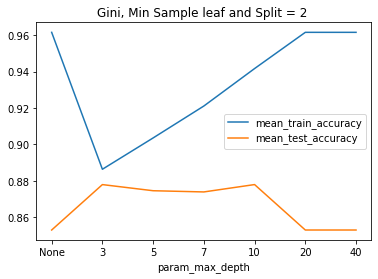

In [ ]:
df_3.plot(x="param_max_depth",title="Gini, Min Sample leaf and Split = 2 ")


Abajo podemos visualizar los resultados con un arbol de profunidad 10 y otro de 3 en test. Sin bien caen todas las métricas, debemos evaluar la métrica que nos interesa optimizar y el costo de no ser tan exacto. Por ejemplo la Accuracy empeora 3 puntos que podria ser un sacrificio razonable en algunos casos. Sin embargo el recall para 1 (no pagaron) empeora 12 puntos.

In [ ]:
clf10 = DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_split=2,min_samples_leaf=2)
clf10.fit(X_train, y_train)
y_train_pred = clf10.predict(X_train)
y_test_pred = clf10.predict(X_test)
clf10.fit(X_train, y_train)
print("arbol con profundidad 10")
print(classification_report(y_test, y_test_pred))

arbol con profundidad 10
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       313
           1       0.75      0.52      0.61        58

    accuracy                           0.90       371
   macro avg       0.83      0.74      0.78       371
weighted avg       0.89      0.90      0.89       371



In [ ]:
clf3 = DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_split=2,min_samples_leaf=2)
clf3.fit(X_train, y_train)
y_train_pred = clf3.predict(X_train)
y_test_pred = clf3.predict(X_test)
clf3.fit(X_train, y_train)
print("arbol con profundidad 3")
print(classification_report(y_test, y_test_pred))

arbol con profundidad 3
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       313
           1       0.66      0.40      0.49        58

    accuracy                           0.87       371
   macro avg       0.78      0.68      0.71       371
weighted avg       0.86      0.87      0.86       371



In [ ]:
clf10 = DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_split=2,min_samples_leaf=2,)
clf10.fit(X_train, y_train)
y_train_pred = clf10.predict(X_train)
y_test_pred = clf10.predict(X_test)
clf10.fit(X_train, y_train)
print("arbol con profundidad 10")
print(classification_report(y_test, y_test_pred))

También podemos cambiar la variable que queremos optimizar. En este caso puntual podríamos estar interesados en identificar aquellos clientes que no van a pagar y para eso debemos buscar el modelo que optimiza la metrica recall. En este caso podemos ver que el Recall de los positivos mejora de 0.4 a 0.6

In [ ]:
parameters = {'criterion':['gini'], 'max_depth':[3,5,10], 'min_samples_split': [2,3,4], 'min_samples_leaf':[1,2,3,4]}
tree = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(tree, parameters, scoring='recall', cv = 5,return_train_score=True)
clf.fit(X_train, y_train)
display ('Best configuraton:')
display(clf.best_params_)

best_model = clf.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

'Best configuraton:'

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [ ]:
#Conjunto de Test
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       313
           1       0.64      0.60      0.62        58

    accuracy                           0.88       371
   macro avg       0.78      0.77      0.78       371
weighted avg       0.88      0.88      0.88       371

